In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def rename_cols(dataframe,building): 
    dataframe.rename(columns = {"kWh": str(building+"_kWh"),"kW": str(building + "_kW")},inplace = True)
    dataframe.head()

In [3]:
def assert_string(dataframe):
    print(type(dataframe["Read Date"][0]).__name__)
    assert(type(dataframe["Read Date"][0]).__name__=="str")

In [4]:
def add_name(dataframe,building):
    dataframe['building'] = building

In [5]:
def plot_daily_data(dataframe): 
    day = [i for i in range(len(dataframe))]
    plt.bar(day,dataframe.iloc[:,2])
    plt.show()

In [6]:
olin = pd.read_csv("olin_daily.csv")
rename_cols(olin,"olin")
day = [i for i in range(len(olin['Read Date']))]
olin

,Read Date,olin_kWh,olin_kW
0,1/1/2020 12:00:00 AM,662.0000,28.8
1,1/2/2020 12:00:00 AM,679.4000,32.8
2,1/4/2020 12:00:00 AM,660.2000,28.8
3,1/5/2020 12:00:00 AM,668.6000,28.8
4,1/6/2020 12:00:00 AM,679.0000,32.0
...,...,...,...
360,12/27/2020 12:00:00 AM,"2,336.5801",128.0
361,12/28/2020 12:00:00 AM,"2,244.6001",108.0
362,12/29/2020 12:00:00 AM,"2,208.3999",103.2
363,12/30/2020 12:00:00 AM,"2,865.9199",181.6


<BarContainer object of 365 artists>

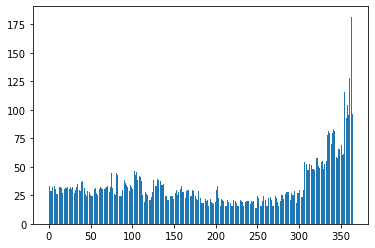

In [7]:
plt.bar(day,olin['olin_kW'])

In [8]:
old_centre = pd.read_csv("old_centre_daily.csv")
old_centre.head()

,Read Date,kWh,kW
0,1/1/2020 12:00:00 AM,4.2536,0.2160
1,1/2/2020 12:00:00 AM,5.1295,0.2760
2,1/3/2020 12:00:00 AM,5.0598,0.2836
3,1/4/2020 12:00:00 AM,4.3785,0.2200
4,1/5/2020 12:00:00 AM,4.4218,0.2160


In [9]:
olin.head()

,Read Date,olin_kWh,olin_kW
0,1/1/2020 12:00:00 AM,662.0000,28.8
1,1/2/2020 12:00:00 AM,679.4000,32.8
2,1/4/2020 12:00:00 AM,660.2000,28.8
3,1/5/2020 12:00:00 AM,668.6000,28.8
4,1/6/2020 12:00:00 AM,679.0000,32.0


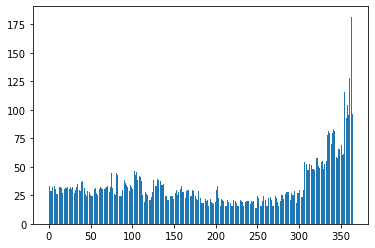

In [10]:
plot_daily_data(olin)

In [11]:
old_centre

,Read Date,kWh,kW
0,1/1/2020 12:00:00 AM,4.2536,0.2160
1,1/2/2020 12:00:00 AM,5.1295,0.2760
2,1/3/2020 12:00:00 AM,5.0598,0.2836
3,1/4/2020 12:00:00 AM,4.3785,0.2200
4,1/5/2020 12:00:00 AM,4.4218,0.2160
...,...,...,...
360,12/27/2020 12:00:00 AM,775.6800,36.0000
361,12/28/2020 12:00:00 AM,799.7400,40.0000
362,12/29/2020 12:00:00 AM,774.4800,36.0000
363,12/30/2020 12:00:00 AM,772.4400,35.2000


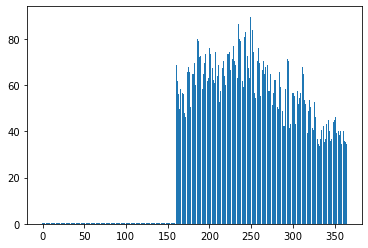

In [12]:
plot_daily_data(old_centre)

In [13]:
assert_string(olin)

str


In [18]:
pearl = pd.read_csv("pearl_daily.csv")
rename_cols(pearl,"pearl")

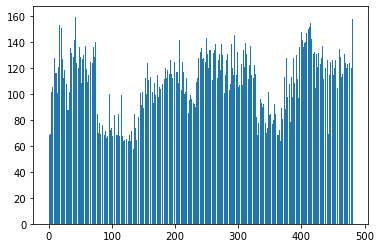

In [19]:
plot_daily_data(pearl)

In [ ]:
jvac = pd.read_csv("jvac_daily.csv")
rename_cols(jvac,"jvac")
assert_string(jvac)

In [ ]:
plot_daily_data(jvac)

In [ ]:
warehouse = pd.read_csv("warehouse.csv")
rename_cols(warehouse,"warehouse")
assert_string(warehouse)

In [ ]:
joined = pd.merge(crounse,warehouse)
assert_string(joined)

In [ ]:
new_join = pd.merge(joined,olin,how="outer")
new_join

In [ ]:
final_join = pd.merge(new_join,old_centre,how="outer")
final_join

In [ ]:
new = pd.merge(jvac,joined)
new.head()